# Project Title: Expressor Customer Churn Prediction, ML Approach


# Introduction:

Churn is a one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe. For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

A giant Telecommunication company in Senegal wants to predict which customers are at high risk of leaving the company or canceling a subscription to a service, based on their behavior towards key products of the company.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem


**Project Description**

Telecommunication companies (telecos) have a significant problem with customer churn, which is the loss of customers who stop using their services. To tackle this problem, telecos need to identify the customers who are likely to churn and take proactive measures to retain them. Machine learning models can help telecos in predicting the customers who are most likely to churn, based on various factors such as customer demographics, usage patterns, and payment history.

The goal of this project is to develop a machine learning model that can accurately predict whether a customer is likely to churn or not. To accomplish this, the project will involve the following steps:


**Data preprocessing:** Perform various data preprocessing tasks such as data cleaning, missing value imputation, feature engineering, and scaling to prepare the data for machine learning models.

**Exploratory data analysis:** Perform exploratory data analysis to understand the distribution of various features, identify outliers, and correlations between features.

**Model selection:** Select appropriate machine learning algorithms such as logistic regression, decision trees, random forests, gradient boosting, and neural networks for churn classification.

**Model training and evaluation:** Train the selected machine learning models on the preprocessed data and evaluate their performance using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

**Hyperparameter tuning:** Perform hyperparameter tuning to optimize the performance of the best-performing model.

**Deployment:** Deploy the final model in a production environment and integrate it with the teleco's customer retention system.

The final deliverables of this project will be a machine learning model that can accurately predict customer churn and a report documenting the entire process of model development, including data preprocessing, exploratory data analysis, model selection, training, evaluation, and hyperparameter tuning. The report will also include recommendations on how the teleco can use the model to improve customer retention and reduce churn.

**Definition of Variables**

REGION: The location of each client

TENURE: Duration with the network

MONTANT: Top-Up Amount

FREQUENCE_RECH: the number of times a customer refilled

REVENUE: Monthly income of each client

ARPU_SEGMENT: income over 90 days / 3

FREQUENCE: number of times the client has made an income.

DATA_VOLUME: number of connections

ON_NET: inter expresso call

ORANGE: calls to orange

TIGO: calls to tigo

ZONE1: calls to zone1

ZONE2: calls to zone2

MRG: a client who is going

REGULARITY: number of times the client is active for 90 days

TOP_PACK: the most active packs

FREQ_TOP_PACK: number of times the client has activated the top pack packages

CHURN: variable to predict - Target

## Hypothesis

1. Customers with longer tenure are less likely to churn than those with short tenure.

2. Customers with lesser income are likely to churn than those who have higher


## Questions:

1. What is the relation of the preditor class (Churn) to other variable
- Churn rate
- Churn vrs. Tenure

2. What type of services offered by the telecom industry (Expressor)

3. What is the average tenure of customers?

4. 

5. 


## Package and libray importations

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# For specifying the axes tick format
import matplotlib.ticker as mtick  
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

## Load the datasets ( test and train)

In [92]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [93]:
train.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

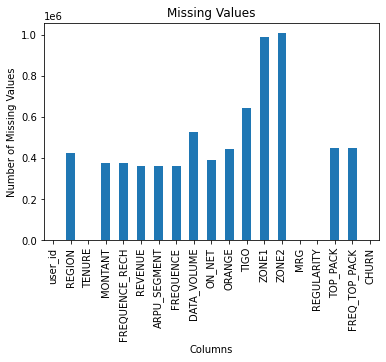

In [94]:
missing_val=train.isnull().sum()
missing_val.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values')
plt.show()

## Data Cleaning 

In [95]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


## Check dataset dimension 

In [96]:
#Check dataset dimension 
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

Number of rows: 1077024
Number of columns: 19


**The train dataset had 19 columns and 1077024 rows**

In [97]:
#Check dataset dimension 
print("Number of rows for test data:", test.shape[0])
print("Number of columns for test data:", test.shape[1])

Number of rows for test data: 190063
Number of columns for test data: 18


**The test dataset had 18 columns and 190063 rows**

## print data types

In [98]:
print(train.dtypes)

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object


From the above, it is observed that each columnhas the required datatypes. This makes it easy for us to our analysis on the dataset

## Working on the user_id column

In [99]:
# Remove user_ids from the data set
train.drop('user_id', axis=1, inplace=True)
# train= train.iloc[:,1:]

In [100]:
train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


## Working on the REGION column

In [101]:
train['REGION'].unique()

array(['DAKAR', nan, 'SAINT-LOUIS', 'THIES', 'LOUGA', 'MATAM', 'FATICK',
       'KAOLACK', 'DIOURBEL', 'TAMBACOUNDA', 'ZIGUINCHOR', 'KOLDA',
       'KAFFRINE', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [102]:
train['REGION'].isnull().sum()

424337

In [103]:
train.isnull().sum()

REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [104]:
missing_value=(train['REGION'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_value)

The percentage of missing value is  39.3990291766943


### Replace missing values with the mode in the REGION column

In [105]:
mode = train['REGION'].mode()[0]

It can be observed that, the Region Column has missing values that has been represented with nan. We need use strategies to replace them or remove them

In [106]:
mode

'DAKAR'

In [107]:
#Replacing the missing values with the mode in that column, which is DAKAR
train['REGION'].fillna(mode, inplace=True)

## Working on the TENURE column

In [108]:
train['TENURE'].unique()

array(['K > 24 month', 'E 6-9 month', 'H 15-18 month', 'G 12-15 month',
       'I 18-21 month', 'J 21-24 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)

In [109]:
train['TENURE'].value_counts()

K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: TENURE, dtype: int64

In [110]:
train['TENURE'].isnull().sum()

0

Grouping the tenure into categories for easy classification

**Some assumption for the categorization**

1. Very Long-term Cust: greater than 24 months.
2. Medium-term Cust: from 18 to 24 months.
3. Mid-term Cust: from 12 to 18 months.
4. Short-term Cust: from 6 to 12 months.
5. Very short-term: less than 6 months.

**Grouping the tenure into categories for easy classification**

In [111]:
tenure_mapping_cat = {
    'K > 24 month': 'Long-term',
    'E 6-9 month': 'Short-term',
    'H 15-18 month': 'Mid-term',
    'G 12-15 month': 'Mid-term',
    'I 18-21 month': 'Medium-term',
    'J 21-24 month': 'Medium-term',
    'F 9-12 month': 'Short-term',
    'D 3-6 month': 'Very short-term'
}
# Map the values using the dictionary
train['TENURE'] = train['TENURE'].map(tenure_mapping_cat)

In [112]:
train['TENURE'].unique()

array(['Long-term', 'Short-term', 'Mid-term', 'Medium-term',
       'Very short-term'], dtype=object)

In [113]:
train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,Long-term,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,DAKAR,Long-term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,DAKAR,Long-term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,Long-term,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,Long-term,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


### Working on the MONTANT column

### checking for unique items in the MONTANT

In [114]:
train['MONTANT'].unique()

array([20000.,    nan,  7900., ..., 35475.,  6216.,  8949.])

### checking for missing values

In [115]:
train['MONTANT'].isnull().sum()

377885

In [116]:
missing_Amt=(train['MONTANT'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_Amt, '%')

The percentage of missing value is  35.08603336601598 %


In [117]:
imp=SimpleImputer(strategy='mean')
train['MONTANT']=imp.fit_transform(train['MONTANT'].values.reshape(-1,1))
train['MONTANT'].isna().sum()

0

Here too we are droping the missing values because the percentage is very small and very negligible

### Working on the FREQUENCE_RECH column

**checking for missing values**

In [118]:
train['FREQUENCE_RECH'].unique()

array([ 47.,  nan,  19.,  21.,   2.,   1.,  13.,   3.,   5.,  14.,   7.,
        20.,  15.,   4.,  16.,  11.,   8.,  23.,  18.,  17.,  12.,  27.,
        50.,  40.,   9.,   6.,  32.,  39.,  33.,  38.,  48.,  60.,  26.,
        49.,  10.,  44.,  22.,  30.,  28.,  46.,  52.,  25.,  45.,  24.,
        36.,  62.,  37.,  58.,  29.,  69.,  51.,  31.,  64.,  35.,  56.,
        85.,  73.,  53.,  55.,  34.,  57.,  43.,  72.,  70.,  65.,  68.,
        61.,  75.,  41.,  42.,  54.,  76.,  80.,  71.,  83.,  82.,  81.,
        59.,  74.,  67.,  63.,  66.,  93.,  78.,  77.,  84.,  79.,  87.,
        88.,  92.,  94., 110.,  86.,  95.,  98.,  89.,  96., 101., 100.,
       114.,  91., 104.,  90., 103.,  97., 106., 109.,  99., 117., 113.,
       112., 121., 115., 108., 111., 119., 118., 102., 105., 131.])

In [119]:
train['FREQUENCE_RECH'].isnull().sum()

377885

In [120]:
missing_Rech=(train['FREQUENCE_RECH'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_Rech,'%')

The percentage of missing value is  35.08603336601598 %


In [121]:
imp=SimpleImputer(strategy='mean')
train['FREQUENCE_RECH']=imp.fit_transform(train['FREQUENCE_RECH'].values.reshape(-1,1))
train['FREQUENCE_RECH'].isna().sum()

0

In [122]:
# train.dropna(subset=['FREQUENCE_RECH'], inplace =True)

### Working on the REVENUE column

**Checking for missing values**

In [123]:
train['REVENUE'].unique()

array([21602.,    nan,  7896., ..., 37609., 21676., 26489.])

In [124]:
train['REVENUE'].isnull().sum()

362355

In [125]:
missing_Rev=(train['REVENUE'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_Rev)

The percentage of missing value is  33.64409706747482


In [126]:
imp=SimpleImputer(strategy='mean')
train['REVENUE']=imp.fit_transform(train['REVENUE'].values.reshape(-1,1))
train['REVENUE'].isna().sum()

0

### Working on the ARPU_SEGMENT

**checking for missing values**

In [127]:
train['ARPU_SEGMENT'].unique()

array([ 7201.,    nan,  2632., ..., 12064., 13153.,  8426.])

In [128]:
train['ARPU_SEGMENT'].isnull().sum()

362355

In [129]:
imp=SimpleImputer(strategy='mean')
train['ARPU_SEGMENT']=imp.fit_transform(train['ARPU_SEGMENT'].values.reshape(-1,1))
train['ARPU_SEGMENT'].isna().sum()

0

### Working on the FREQUENCE

**checking for missing values**

In [130]:
train['FREQUENCE'].unique()

array([52., nan, 25., 29.,  3.,  1., 14., 46., 13.,  7., 21., 81.,  5.,
        4.,  2., 10., 18., 12.,  6., 23., 28., 22.,  9., 39., 51., 44.,
       40., 19., 43., 17., 49., 26., 83.,  8., 16., 11., 66., 41., 20.,
       30., 15., 55., 82., 24., 32., 48., 36., 38., 35., 54., 27., 31.,
       37., 33., 59., 58., 34., 74., 53., 67., 47., 64., 50., 87., 73.,
       61., 45., 62., 42., 77., 76., 69., 78., 60., 63., 89., 71., 56.,
       65., 70., 68., 90., 57., 85., 79., 72., 75., 88., 84., 80., 86.,
       91.])

In [131]:
train['FREQUENCE'].isnull().sum()

362355

In [132]:
imp=SimpleImputer(strategy='mean')
train['FREQUENCE']=imp.fit_transform(train['FREQUENCE'].values.reshape(-1,1))
train['FREQUENCE'].isna().sum()

0

### Working on the DATA_VOLUME

**checking for missing values**

In [133]:
train['DATA_VOLUME'].unique()

array([ 8835.,    nan,  9385., ..., 80216., 33402., 42695.])

In [134]:
train['DATA_VOLUME'].isnull().sum()

529763

In [135]:
missing_DaVol=(train['DATA_VOLUME'].isnull().sum()/len(train))*100
print('The percentage of missing value is ', missing_DaVol, '%')

The percentage of missing value is  49.18766898416377 %


In [136]:
imp=SimpleImputer(strategy='mean')
train['DATA_VOLUME']=imp.fit_transform(train['DATA_VOLUME'].values.reshape(-1,1))
train['DATA_VOLUME'].isna().sum()

0

### Working on the ON_NET

**checking for missing values**

In [137]:
train['ON_NET'].unique()

array([3391.,   nan,   27., ..., 6897., 5332., 6794.])

In [138]:
train['ON_NET'].isnull().sum()

393174

In [139]:
missing_net=(train['ON_NET'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_net, '%')

The percentage of missing value is  36.505593190123896 %


**Using the Simple Imputer method to replace missing values in the ON_NET**

In [140]:
imp=SimpleImputer(strategy='mean')
train['ON_NET']=imp.fit_transform(train['ON_NET'].values.reshape(-1,1))
train['ON_NET'].isna().sum()

0

## Working on the ORANGE

**checking missing values**

In [141]:
train['ORANGE'].unique()

array([ 396.,   nan,   46., ..., 3250., 3505., 2635.])

In [142]:
train['ORANGE'].isnull().sum()

447144

In [143]:
missing_org=(train['ORANGE'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_org, '%')

The percentage of missing value is  41.516623584989745 %


**Using the Simple Imputer method to replace missing values in the ORANGE**

In [144]:
imp=SimpleImputer(strategy='mean')
train['ORANGE']=imp.fit_transform(train['ORANGE'].values.reshape(-1,1))
train['ORANGE'].isna().sum()

0

## Working on the TIGO columns

In [145]:
train['TIGO'].unique()

array([ 185.,   nan,   20., ..., 1009.,  703., 1014.])

In [146]:
train['TIGO'].isnull().sum()

644774

In [147]:
missing_tg=(train['TIGO'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_tg, '%')

The percentage of missing value is  59.866261104673626 %


In [148]:
imp=SimpleImputer(strategy='mean')
train['TIGO']=imp.fit_transform(train['TIGO'].values.reshape(-1,1))
train['TIGO'].isna().sum()

0

## Working on the ZONE1

In [149]:
train['ZONE1'].unique()

array([      nan, 0.000e+00, 3.000e+00, 8.000e+00, 1.000e+00, 4.500e+01,
       2.000e+00, 2.100e+01, 2.600e+01, 6.600e+01, 5.000e+00, 1.400e+01,
       6.000e+00, 1.410e+02, 7.000e+00, 8.400e+01, 2.200e+01, 2.700e+01,
       4.000e+00, 1.600e+01, 3.900e+01, 1.300e+01, 1.500e+01, 7.100e+01,
       5.600e+01, 1.100e+01, 9.000e+00, 2.300e+01, 4.870e+02, 6.500e+01,
       2.000e+01, 4.100e+01, 2.500e+01, 1.000e+01, 5.300e+01, 3.700e+01,
       7.000e+01, 1.200e+01, 3.160e+02, 5.100e+01, 1.050e+02, 4.900e+01,
       1.060e+02, 9.600e+01, 1.690e+02, 7.670e+02, 3.100e+01, 2.950e+02,
       1.160e+02, 1.800e+01, 1.700e+01, 1.170e+02, 2.800e+01, 5.690e+02,
       1.090e+02, 3.200e+01, 7.500e+01, 3.600e+01, 6.000e+01, 8.000e+01,
       1.020e+02, 3.000e+01, 6.700e+01, 3.300e+01, 3.000e+02, 5.900e+01,
       1.220e+02, 5.700e+01, 4.240e+02, 1.260e+02, 4.300e+01, 8.200e+01,
       8.500e+01, 6.200e+01, 1.630e+02, 5.400e+01, 1.310e+02, 1.010e+02,
       1.900e+01, 3.800e+01, 2.280e+02, 1.880e+02, 

In [150]:
train['ZONE1'].isnull().sum()

992126

In [151]:
missing_z1=(train['ZONE1'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_z1, '%')

The percentage of missing value is  92.11735300234722 %


In [152]:
imp=SimpleImputer(strategy='mean')
train['ZONE1']=imp.fit_transform(train['ZONE1'].values.reshape(-1,1))
train['ZONE1'].isna().sum()

0

## Working on the ZONE2 column

**Checking for missing values**

In [153]:
train['ZONE2'].unique()

array([      nan, 2.000e+00, 0.000e+00, 9.000e+00, 8.000e+00, 5.000e+00,
       1.000e+00, 4.000e+00, 1.800e+01, 3.000e+00, 1.500e+01, 7.000e+00,
       1.200e+01, 3.400e+01, 6.000e+00, 1.600e+01, 1.000e+01, 6.300e+01,
       2.000e+01, 1.400e+01, 2.300e+01, 2.900e+01, 1.700e+01, 2.400e+01,
       6.000e+01, 2.200e+01, 1.900e+01, 2.600e+01, 1.300e+01, 4.400e+01,
       1.100e+01, 3.700e+01, 2.500e+01, 3.200e+01, 3.100e+01, 3.000e+01,
       8.300e+01, 6.700e+01, 6.600e+01, 4.840e+02, 1.740e+02, 1.230e+02,
       5.500e+01, 6.900e+01, 3.420e+02, 3.460e+02, 5.900e+01, 3.500e+01,
       2.700e+01, 1.060e+02, 1.590e+02, 4.200e+01, 4.000e+01, 5.010e+02,
       4.600e+01, 2.100e+01, 4.100e+01, 3.600e+01, 9.500e+01, 5.800e+01,
       3.300e+01, 3.410e+02, 6.800e+01, 3.800e+01, 1.630e+02, 8.100e+01,
       4.080e+02, 1.960e+02, 1.220e+02, 5.200e+01, 9.300e+01, 8.400e+01,
       7.000e+01, 4.300e+01, 1.140e+02, 1.990e+02, 3.860e+02, 3.697e+03,
       7.100e+01, 1.090e+02, 6.100e+01, 3.900e+01, 

In [154]:
train['ZONE2'].isnull().sum()

1008230

In [155]:
missing_z2=(train['ZONE2'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_z2, '%')

The percentage of missing value is  93.612584306385 %


**Replacing the missing values using the simple imputer strategy**

In [156]:
imp=SimpleImputer(strategy='mean')
train['ZONE2']=imp.fit_transform(train['ZONE2'].values.reshape(-1,1))
train['ZONE2'].isna().sum()

0

In [157]:
train['ZONE2'].isnull().sum()

0

## Working on the MRG column

In [158]:
train['MRG'].unique()

array(['NO'], dtype=object)

In [159]:
train['MRG'].isnull().sum()

0

## Working on the REGULARITY

In [160]:
train['REGULARITY'].unique()

array([62,  3,  1, 61, 56,  6, 10,  2, 16, 43,  8, 18, 12, 24, 54, 29, 14,
       40, 23, 52, 60, 34, 13, 46, 47, 31,  9, 58, 38, 36, 19,  5, 39, 55,
       27,  4, 32, 26, 17, 48, 22, 53, 59, 20, 44,  7, 41, 49, 33, 42, 28,
       30, 15, 57, 21, 11, 45, 50, 25, 37, 51, 35], dtype=int64)

In [161]:
train['REGULARITY'].isnull().sum()

0

## Working on the TOP_PACK column

In [162]:
train['TOP_PACK'].unique()

array(['On net 200F=Unlimited _call24H', nan, 'Data:490F=1GB,7d',
       'All-net 500F=2000F;5d', 'On-net 500=4000,10d',
       'Data:3000F=10GB,30d', 'Data:200F=Unlimited,24H',
       'IVR Echat_Daily_50F', 'Data:1000F=2GB,30d',
       'Mixt 250F=Unlimited_call24H', 'On-net 1000F=10MilF;10d',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'Data: 200 F=100MB,24H', 'All-net 600F= 3000F ;5d',
       'On-net 200F=60mn;1d', 'Twter_U2opia_Daily',
       'Data: 100 F=40MB,24H', 'All-net 500F =2000F_AllNet_Unlimited',
       'On net 200F= 3000F_10Mo ;24H', '200=Unlimited1Day', 'Jokko_Daily',
       'Data:1000F=5GB,7d', 'Data:700F=1.5GB,7d', 'All-net 1000=5000;5d',
       'Data:150F=SPPackage1,24H', 'IVR Echat_Monthly_500F',
       'VAS(IVR_Radio_Daily)', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'MIXT: 200mnoff net _unl on net _5Go;30d', 'On-net 500F_FNF;3d',
       'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
       'Data:1500F=3GB,30D', 'Data:300F=100MB,2d', 'Data:500F

Here there is the need to create some sort of category or groupings to assist in analyzing our TOP_PACKS

This is the breakdowns 
1. Voice related top packs
2. Data related top packs
3. Social Media top packs
4. Messaging top packs 
5. Foreign Voice top packs
6. Any other services not captured in the above category



**We created a dictionary to handle these**

In [163]:
voice_related =['On net 200F=Unlimited _call24H','All-net 500F=2000F;5d','On-net 500=4000,10d','On-net 500F_FNF;3d','On-net 300F=1800F;3d'
         'On-net 200F=60mn;1d','On net 200F= 3000F_10Mo ;24H','On-net 1000F=10MilF;10d','MIXT:500F= 2500F on net _2500F off net;2d',
         'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t','MIXT: 200mnoff net _unl on net _5Go;30d','MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
         'MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t','MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t','Mixt : 500F=2500Fonnet_2500Foffnet ;5d','200F=10mnOnNetValid1H',
         '500=Unlimited3Day','150=unlimited pilot auto','CVM_100F_unlimited','CVM_100f=200 MB','CVM_100f=500 onNet','CVM_150F_unlimited',
         'CVM_200f=400MB','CVM_500f=2GB','CVM_On-net 400f=2200F','CVM_On-net 1300f=12500','EVC_100Mo','EVC_1Go','EVC_4900=12000F','EVC_500=2000F','EVC_700Mo',
         'EVC_JOKKO30','EVC_Jokko_Weekly','FNF2 ( JAPPANTE)','GPRS_3000Equal10GPORTAL','GPRS_PKG_5GO_ILLIMITE''NEW_CLIR_PERMANENT_LIBERTE_MOBILE',
         'NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE','Pilot_Youth1_290','Pilot_Youth4_490','Postpaid FORFAIT 10H Package','Staff_CPE_Rent','SUPERMAGIK_1000','SUPERMAGIK_5000',
         'WIFI_ Family _10MBPS','WIFI_ Family _4MBPS','YMGX 100=1 hour FNF, 24H/1 month','YMGX on-net 100=700F, 24H','Yewouleen_PKG','301765007','305155009',
        'Mixt 250F=Unlimited_call24H','All-net 500F =2000F_AllNet_Unlimited','All-net 600F= 3000F ;5d','On-net 200F=60mn;1d','200=Unlimited1Day',
        'All-net 1000=5000;5d', 'All-net 1000F=(3000F On+3000F Off);5d','All-net 500F=1250F_AllNet_1250_Onnet;48h','On-net 300F=1800F;3d',
        'MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d','CVM_on-net bundle 500=5000', 'All-net 300=600;2d','IVR Echat_Weekly_200F',
        'MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t','On-net 2000f_One_Month_100H; 30d','TelmunCRBT_daily','pilot_offer6',
        'All-net 5000= 20000off+20000on;30d', 'All-net 500F=4000F ; 5d','Incoming_Bonus_woma', '1000=Unlimited7Day','MIXT: 4900F= 10H on net_1,5Go ;30d',
       'pilot_offer4','All-net 500= 4000off+4000on;24H','1500=Unlimited7Day','200=unlimited pilot auto']
train['TOP_PACK'] = np.where(train['TOP_PACK'].isin(voice_related), 'voice', train['TOP_PACK'])


data_related = ['Data','DataPack_Incoming','Data_EVC_2Go24H','Data_Mifi_20Go','Data_Mifi_10Go_Monthly','Data:490F=1GB,7d','Data: 100 F=40MB,24H',
                'Data:3000F=10GB,30d','Data:200F=Unlimited,24H','Data:1000F=2GB,30d','Data:200 F=100MB,24H','Data:700F=1.5GB,7d','Data:1000F=5GB,7d','Data:700F=1.5GB,7d',
                'Data:150F=SPPackage1,24H','Data:1500F=3GB,30D','Data:300F=100MB,2d','Data:500F=2GB,24H','Data: 490F=Night,00H-08H',
                'Data:DailyCycle_Pilot_1.5GB','Data:50F=30MB_24H','Data:700F=SPPackage1,7d','Data: 200F=1GB,24H','Data:OneTime_Pilot_1.5GB''Data:1500F=3GB,30D',
                'Data:300F=100MB,2d','Data:500F=2GB,24H','Data: 490F=Night,00H-08H','Data: 200 F=100MB,24H','Data:1500F=SPPackage1,30d',
                'WIFI_Family_2MBPS','Data:OneTime_Pilot_1.5GB']
train['TOP_PACK'] = np.where(train['TOP_PACK'].isin(data_related), 'data', train['TOP_PACK'])


vas = ['IVR Echat_Daily_50F','IVR Echat_Monthly_500F','VAS(IVR_Radio_Daily)','VAS(IVR_Radio_Monthly)','VAS(IVR_Radio_Weekly)',
                'MROMO_TIMWES_RENEW','MROMO_TIMWES_OneDAY', 'Jokko_Daily','Jokko_Monthly','Jokko_promo','FIFA_TS_daily',
                'FIFA_TS_weekly','APANews_weekly','APANews_monthly','Jokko_Weekly','Data:30Go_V 30_Days']
train['TOP_PACK'] = np.where(train['TOP_PACK'].isin(vas), 'VAS', train['TOP_PACK'])


social_media_related=['Twter_U2opia_Daily','Twter_U2opia_Weekly','Twter_U2opia_Monthly','Facebook_MIX_2D']
train['TOP_PACK'] = np.where(train['TOP_PACK'].isin(social_media_related), 'social_media', train['TOP_PACK'])


inter_related= ['Internat: 1000F_Zone_1;24H','Internat: 1000F_Zone_3;24h','Internat: 2000F_Zone_2;24H','Internat: 1000F_Zone_1;24H\t\t',
                          'Internat: 1000F_Zone_3;24h\t\t','Internat: 2000F_Zone_2;24H\t\t']
train['TOP_PACK'] = np.where(train['TOP_PACK'].isin(inter_related), 'international', train['TOP_PACK'])


message_related = ['SMS Max','messaging']
train['TOP_PACK'] = np.where(train['TOP_PACK'].isin(message_related), 'messaging', train['TOP_PACK'])


other_services =[ 'New_YAKALMA_4_ALL','FNF_Youth_ESN','GPRS_PKG_5GO_ILLIMITE','NEW_CLIR_PERMANENT_LIBERTE_MOBILE','pack_chinguitel_24h']
train['TOP_PACK'] = np.where(train['TOP_PACK'].isin(other_services), 'other_services', train['TOP_PACK'])


In [164]:
train['TOP_PACK'].unique()

array(['voice', nan, 'data', 'VAS', 'social_media', 'other_services',
       'international', 'messaging'], dtype=object)

In [165]:
train['TOP_PACK'].isnull().sum()

450895

In [166]:
missing_z2=(train['TOP_PACK'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_z2, '%')

The percentage of missing value is  41.864898089550465 %


In [167]:
mode = train['TOP_PACK'].mode()[0]

In [168]:
mode

'voice'

In [169]:
#Replacing the missing values with the mode in that column, which is voice
train['TOP_PACK'].fillna(mode, inplace=True)

## Working on FREQ_TOP_PACK

In [170]:
train['FREQ_TOP_PACK'].unique()

array([ 30.,  nan,   7.,  11.,   1.,  12.,   3.,   9.,  79.,   2.,  13.,
         8.,   6.,  26.,   4.,   5.,  21.,  10.,  18.,  19.,  49.,  20.,
        16.,  40.,  23.,  36.,  42., 122.,  24.,  46.,  27.,  17.,  14.,
        31.,  53.,  15.,  58.,  28.,  65.,  22.,  60.,  25.,  80.,  51.,
        29.,  41.,  39.,  54.,  47.,  48.,  71.,  52.,  45.,  44.,  38.,
        32.,  66.,  33.,  78.,  59.,  37.,  64.,  34.,  57.,  87.,  35.,
        50.,  61.,  90.,  81.,  76.,  84.,  67.,  56.,  43., 100.,  69.,
        70.,  89.,  88.,  82., 106.,  55.,  62.,  63.,  74.,  75., 130.,
        72.,  95.,  68., 127., 102., 109.,  83.,  77., 190.,  99.,  73.,
       225.,  91.,  92., 110.,  85., 258., 103., 101.,  97.,  86., 114.,
       104., 105.,  94.,  93.,  98., 108., 126., 200.,  96., 129., 134.,
       124., 125., 113., 148., 159., 138., 180., 117., 161., 144., 119.,
       107., 151., 118., 178., 592., 154., 115., 112., 170., 139., 128.,
       320., 120., 340., 152., 142., 133., 116., 16

In [171]:
train['FREQ_TOP_PACK'].isnull().sum()

450895

In [172]:
missing_freq=(train['FREQ_TOP_PACK'].isnull().sum()/len(train)) *100
print('The percentage of missing value is ', missing_freq, '%')

The percentage of missing value is  41.864898089550465 %


In [173]:
imp=SimpleImputer(strategy='mean')
train['FREQ_TOP_PACK']=imp.fit_transform(train['FREQ_TOP_PACK'].values.reshape(-1,1))
train['FREQ_TOP_PACK'].isna().sum()

0

In [174]:
train.isnull().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [175]:
train.shape

(1077024, 18)

In [176]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1077024.0,5529.210895,5724.229391,20.0,2000.000000,5529.210895,5529.210895,470000.0
FREQUENCE_RECH,1077024.0,11.523756,10.685036,1.0,4.000000,11.523756,11.523756,131.0
REVENUE,1077024.0,5506.050798,5845.200520,1.0,1900.000000,5506.050798,5506.050798,532177.0
ARPU_SEGMENT,1077024.0,1835.355961,1948.396832,0.0,633.000000,1835.355961,1835.355961,177392.0
FREQUENCE,1077024.0,13.974439,11.963948,1.0,6.000000,13.974439,13.974439,91.0
DATA_VOLUME,1077024.0,3368.801722,9194.708896,0.0,232.000000,3368.801722,3368.801722,1702309.0
ON_NET,1077024.0,277.065798,696.683839,0.0,12.000000,213.000000,277.065798,50809.0
ORANGE,1077024.0,95.160804,155.258526,0.0,20.000000,95.160804,95.160804,12040.0
TIGO,1077024.0,23.105018,40.567203,0.0,11.000000,23.105018,23.105018,4174.0
ZONE1,1077024.0,8.167483,11.018635,0.0,8.167483,8.167483,8.167483,2507.0


**Summary of the .describe function**

###### MONTANT

- Count: 1077024.0
- Mean: 5529.210895
- Standard Deviation: 5724.229391
- Range: 20 to 470000.0

###### FREQUENCE_RECH

- Count: 1077024.0
- Mean: 11.523756	
- Standard Deviation: 10.685036
- Range: 1 to 131.0

###### REVENUE

- Count: 1077024.0
- Mean: 5506.050798
- Standard Deviation: 5845.200520
- Range: 1 to 532177.0

###### ARPU_SEGMENT

- Count: 1077024.0
- Mean: 1835.355961
- Standard Deviation: 11.963948
- Range: 1 to 177392.0

###### FREQUENCE

- Count: 1077024.0
- Mean: 13.974439
- Standard Deviation: 116.58
- Range: 0 to 846

###### DATA_VOLUME

- Count: 1077024.0
- Mean: 3368.801722
- Standard Deviation: 9194.708896
- Range: 0 to 1702309.0

###### ON_NET

- Count: 1077024.0
- Mean: 277.065798
- Standard Deviation: 696.683839
- Range: 0 to 50809.0

In [177]:
train.to_csv('final_train.csv', index=False)

## Exploratory Data Analysis: EDA
**Here is the section to inspect the datasets in depth, present it, make hypotheses and answer some business questions, processing and features creation**

**Here we loaded the clean data set**

In [90]:
train_final=pd.read_csv('final_train.csv')

**Univariate Analysis**

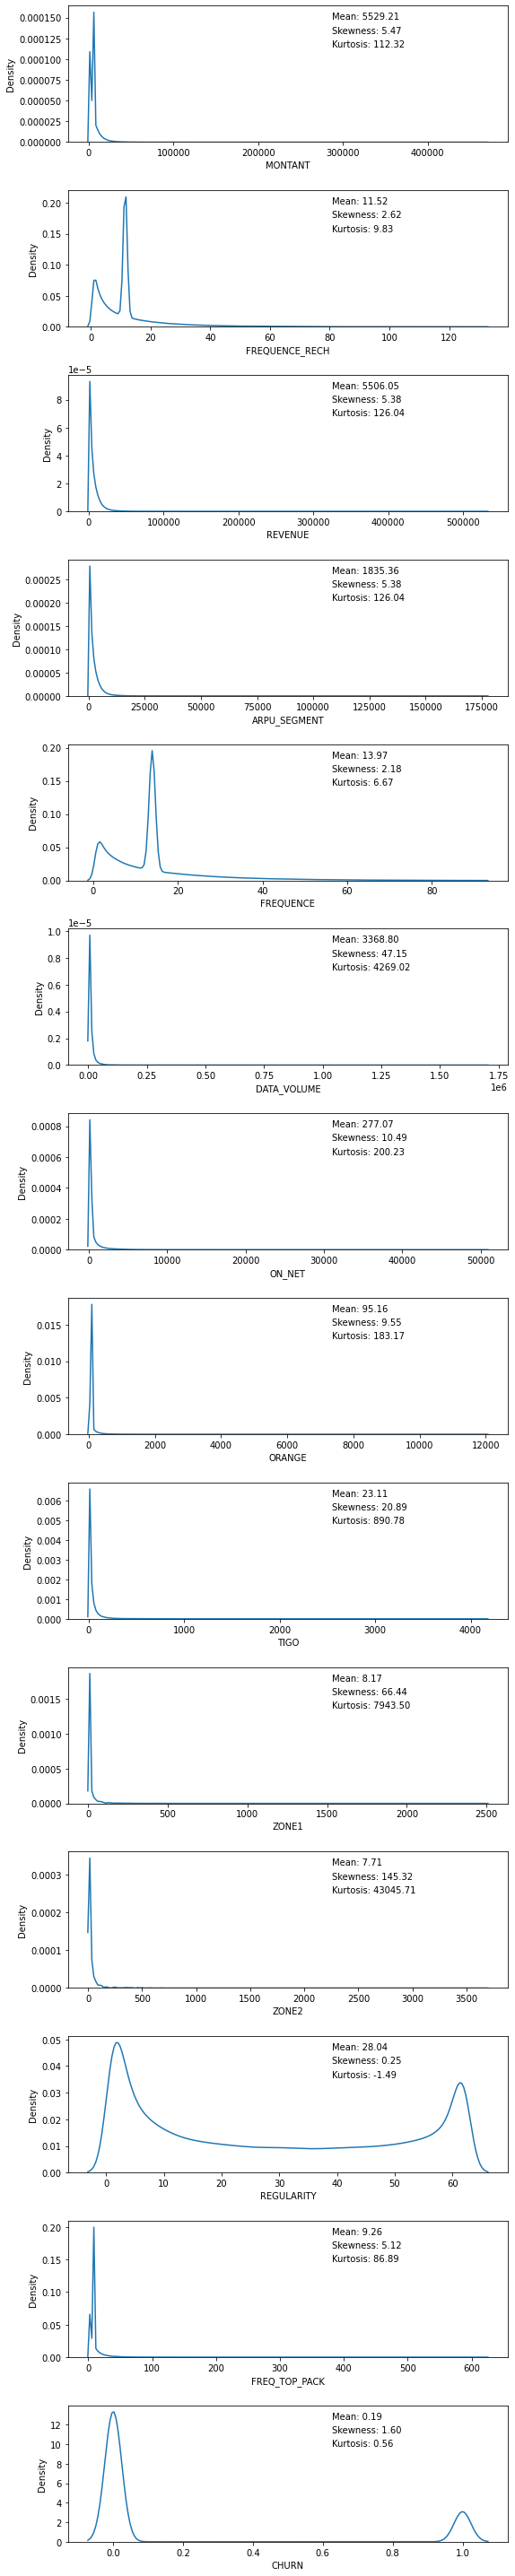

In [84]:
# Extracting all numerical variables 
num_cols = train_final.select_dtypes(include=['int64','float64']).columns

# Plot KDEs(kernel density estimation) for all numerical columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 40))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=train, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = train[col].mean()
    skewness_val = train[col].skew()
    kurtosis_val = train[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
plt.tight_layout()
plt.show()

KDE plot of all the numerical variables 

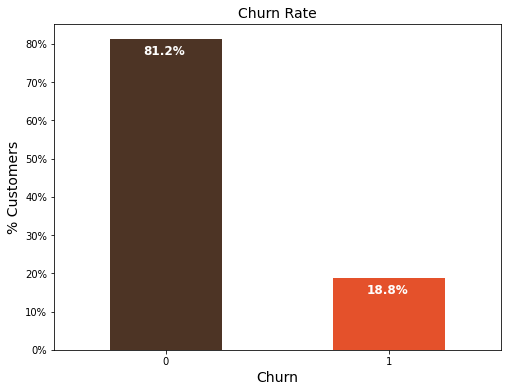

In [87]:
colors = ['#4D3425','#E4512B']
ax = (train_final['CHURN'].value_counts()*100.0 /len(train)).plot(kind='bar', stacked = True, 
                                                                          rot = 0, color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**Summary**

The chart above demonstrate the how distributed the target variable is in the Expressor dataset

**Inpterpretation**

- The deep brown bars represent the count of non-churned (0) customers in the dataset,
- The orange bar represent the count/percentage of churned customers.
- The percentage of churn is 81.2% and Non-churned is 18.8% in the dataset

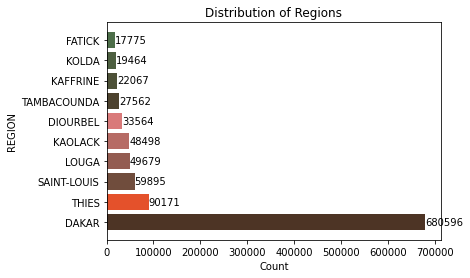

In [92]:
#Horizontal bar distribution of the Region
region= train_final['REGION'].value_counts().head(10)
colors = ['#4D3425','#E4512B','#704D3D','#935C51','#B66B65','#D97A7A','#4D422E','#4D5137','#4D5F40','#4D6E49']

plt.barh(region.index, region.values, color=colors)
plt.xlabel('Count')
plt.ylabel('REGION')
plt.title('Distribution of Regions')

# Add data labels
for i, count in enumerate(region.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

**Dakar has the greatest share of the the dataset meaning that Expressor has alot of Customer of Dakar**

Plot of TOP_PACK Column

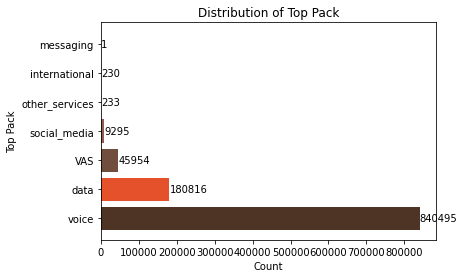

In [91]:
# Barplot to show the distribution of the TOP_PACK
top_pack_counts = train_final['TOP_PACK'].value_counts().head(10)
colors = ['#4D3425','#E4512B','#704D3D','#935C51','#B66B65','#D97A7A','#4D422E','#4D5137','#4D5F40','#4D6E49']

plt.barh(top_pack_counts.index, top_pack_counts.values, color=colors)
plt.xlabel('Count')
plt.ylabel('Top Pack')
plt.title('Distribution of Top Pack')

# Add data labels
for i, count in enumerate(top_pack_counts.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

**Recharge Distribution (FREQUENCE_RECH)**

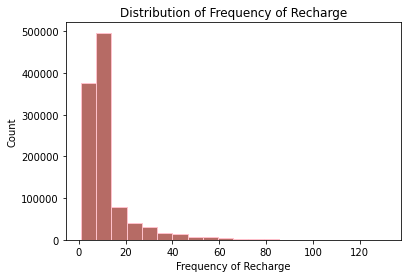

In [105]:
colors = ['#B66B65']

plt.hist(train_final['FREQUENCE_RECH'], bins=20, color=colors, edgecolor='pink')
plt.xlabel('Recharge Frequency')
plt.ylabel('Count')
plt.title('Distribution of Frequency of Recharge')

plt.show()

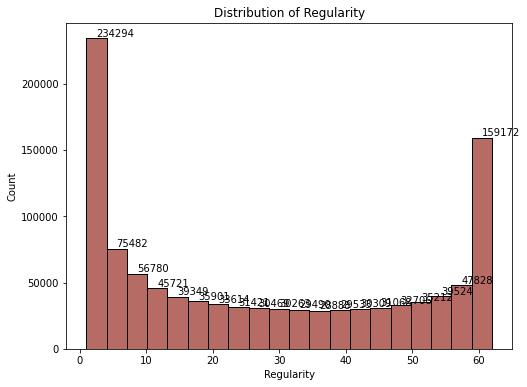

In [111]:
plt.figure(figsize=(8, 6))
colors=['#B66B65']
plt.hist(train_final['REGULARITY'], bins=20, color=colors, edgecolor='black')

plt.xlabel('Regularity')
plt.ylabel('Count')
plt.title('Distribution of Regularity')

# Add labels to each bar
counts, bins, _ = plt.hist(train['REGULARITY'], bins=20, color=colors, edgecolor='black')
for count, bin in zip(counts, bins):
    if count > 0:
        plt.text(bin + (bins[1] - bins[0]) / 2, count + 10, str(int(count)), ha='left', va='bottom', fontsize=10, color='black')

plt.show()

## Bivariate Analysis

**In this analysis, we compare two variables in the Expressor dataset**

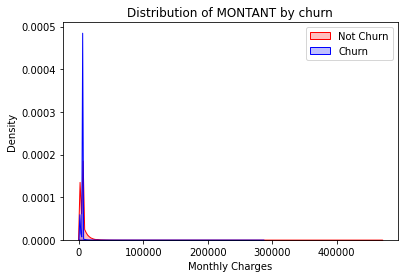

In [112]:
ax = sns.kdeplot(train_final.MONTANT[(train["CHURN"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(train.MONTANT[(train_final["CHURN"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('MONTANT')
ax.set_title('Distribution of MONTANT by churn')

plt.show()

## Multivariate Analysis

<AxesSubplot:>

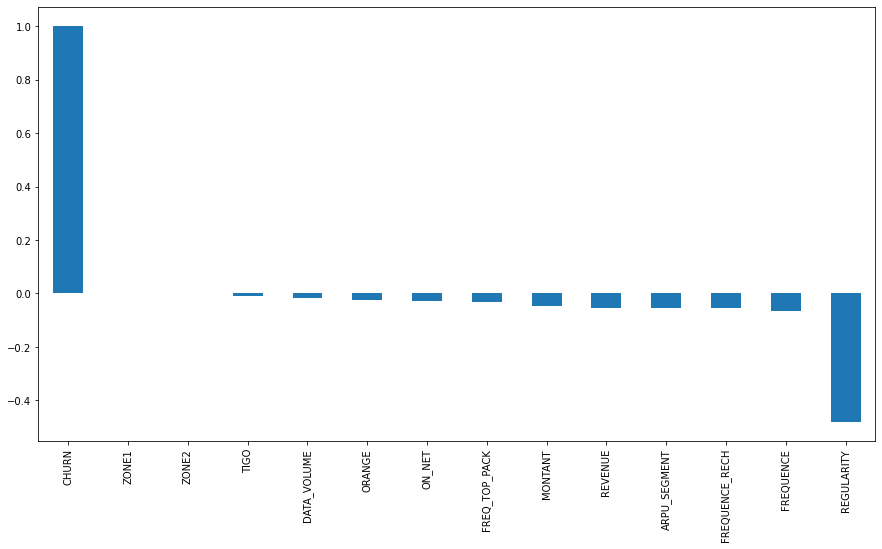

In [93]:
#Checking the Correlation of "Churn" with other variables in the dataset:
plt.figure(figsize=(15,8))
train_final.corr()['CHURN'].sort_values(ascending = False).plot(kind='bar')

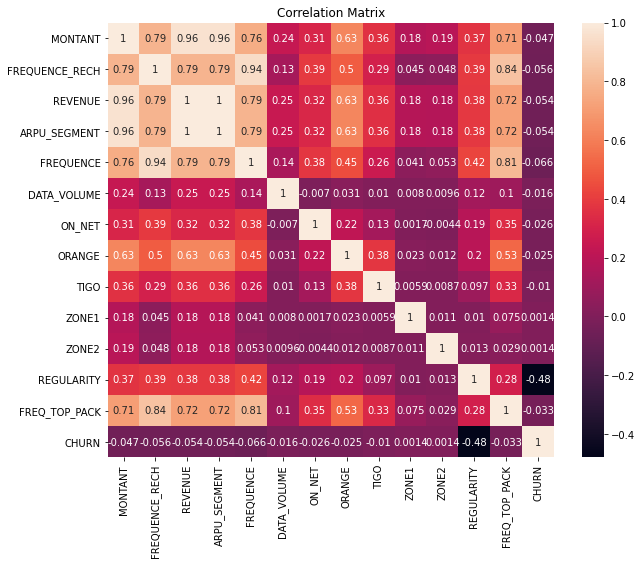

In [94]:
# Calculate correlation matrix
correl =train_final.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correl, annot=True)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [95]:
# class distribution of target variable
Distribution= train_final['CHURN'].value_counts()

In [97]:
print('Class distribution:', Distribution)

Class distribution: 0    875031
1    201993
Name: CHURN, dtype: int64


**Checking for churn in each columns**

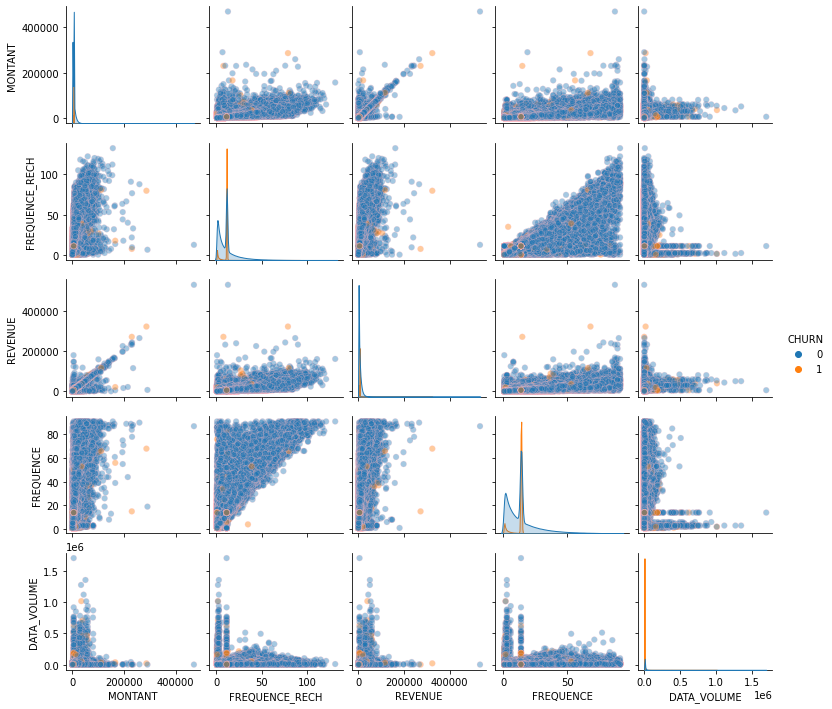

In [99]:
# split 'MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN churn and not_churn categories
sns.pairplot(train_final[['MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN']],hue='CHURN',
             plot_kws=dict(alpha=0.4, edgecolor='pink'),height=2,aspect=1.1)

In [100]:
#checking the shape of the dataset
print('Number of rows ',train_final.shape[0])
print('Number of columns ',train_final.shape[1])

Number of rows  1077024
Number of columns  18
